In [1]:
'1. Giới Thiệu'
'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'
'https://www.kaggle.com/gabrielstpierre/optimization-algorithms-in-keras?fbclid=IwAR0ZtLxjtalZeYZjKd8uM4gJMc_vJv3g7aaDRnJyrPiCuCpCUV43wL6Vzv0'

'https://www.kaggle.com/gabrielstpierre/optimization-algorithms-in-keras?fbclid=IwAR0ZtLxjtalZeYZjKd8uM4gJMc_vJv3g7aaDRnJyrPiCuCpCUV43wL6Vzv0'

In [2]:
'1. Import packages'

'1. Import packages'

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
sns.set(style = 'white', context = 'notebook', palette = 'deep')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda
from keras.optimizers import RMSprop, SGD, Adagrad, Adam, Adadelta  
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
from math import pi
from math import cos
from math import floor
from keras.callbacks import Callback
from keras import backend
from numpy import argmax
from subprocess import check_output
from keras.layers import Convolution2D, MaxPooling2D
import keras
from keras.callbacks import ModelCheckpoint
import tensorflow as tf


Using TensorFlow backend.


In [4]:
tf.__version__


'2.1.0'

In [5]:
keras.__version__


'2.3.1'

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15353278113214407128
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6614579282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16224927273807246630
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [7]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [8]:
'2. Load dữ liệu'

'2. Load dữ liệu'

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
'3. Khám phá dữ liêu'

'3. Khám phá dữ liêu'

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
print('Training shape: {}'.format(train.shape))


Training shape: (42000, 785)


In [13]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print('Test shape: {}'.format(test.shape))

Test shape: (28000, 784)


In [15]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trainX = (train.iloc[:,1:].values).astype('float32')
trainY = (train.iloc[:, 0]).values.astype('float32')
testX = test.values.astype('float32')
#del train


In [17]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
trainY

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [19]:
Y = train['label']
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

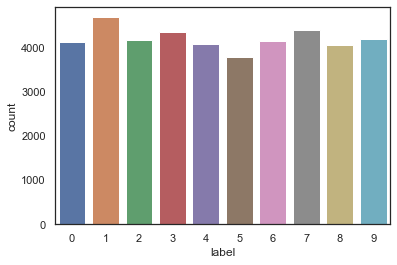

In [20]:
plot = sns.countplot(Y)



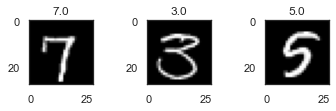

In [21]:
trainX = trainX.reshape(trainX.shape[0], 28, 28)
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(trainY[i])

In [22]:
'4. Tiền Xử lý dữ liệu'

'4. Tiền Xử lý dữ liệu'

In [23]:
trainX = trainX.reshape(-1,28,28,1)
trainX.shape

(42000, 28, 28, 1)

In [24]:
testX = testX.reshape(-1,28,28,1)
testX.shape

(28000, 28, 28, 1)

In [25]:
meanX = trainX.mean().astype(np.float32)
std_X = trainX.std().astype(np.float32)

In [26]:
def standardization(x):
    return (x-meanX)/std_X

In [27]:
trainY = to_categorical(trainY, num_classes = 10)
classes = trainY.shape[1]
classes

10

In [28]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.10, random_state=2)

In [29]:
trainX.shape

(37800, 28, 28, 1)

In [30]:
testX.shape


(4200, 28, 28, 1)

In [31]:
trainY.shape


(37800, 10)

In [32]:
testY.shape


(4200, 10)

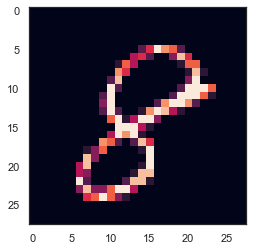

In [33]:
g = plt.imshow(trainX[0][:,:,0])


In [34]:
datagen = ImageDataGenerator(featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)


In [35]:
datagen.fit(trainX)


In [36]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [37]:
trainX.shape

(37800, 28, 28, 1)

In [38]:
'5. Xây dựng model'

'5. Xây dựng model'

In [39]:
## Architechture

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [40]:
## Model parameters

epochs = 60 ## We keep it low for minimum training time. Increase if better performance is needed.
batch_size = 32
verbose = 2
step_per_epoch = trainX.shape[0] // batch_size
loss = 'categorical_crossentropy'
learning_rate = 0.1

In [41]:
Momentum_opti = SGD(lr= learning_rate, momentum = 0.9, nesterov = False)


In [42]:
Adagrad_opti = Adagrad(lr = learning_rate, epsilon = None, decay = 0.9)

In [49]:
Adadelta_opti = Adadelta(lr = learning_rate, rho = 0.9)

In [44]:
RMSProp_opti = RMSprop(lr = learning_rate, rho = 0.9, decay = 0.9, epsilon = 1e-10)


In [45]:
Adam_opti = Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-10, decay = 0.9, amsgrad = False)

In [122]:
"Train model using SGD"

'Train model using SGD'

In [123]:
model.compile(optimizer = Momentum_opti, loss = loss, metrics = ["accuracy"])


In [165]:
    mcp = keras.callbacks.ModelCheckpoint("model_CNN_SGD.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
    es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [166]:
## Training Time!
history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 5629.7926 - accuracy: 0.1072 - val_loss: 2.2852 - val_accuracy: 0.1176

Epoch 00001: val_accuracy improved from -inf to 0.11762, saving model to model_CNN_SGD.h5
Epoch 2/60
 - 8s - loss: 2.2955 - accuracy: 0.1099 - val_loss: 2.2740 - val_accuracy: 0.1250

Epoch 00002: val_accuracy improved from 0.11762 to 0.12500, saving model to model_CNN_SGD.h5
Epoch 3/60
 - 7s - loss: 2.2915 - accuracy: 0.1145 - val_loss: 2.2652 - val_accuracy: 0.1317

Epoch 00003: val_accuracy improved from 0.12500 to 0.13167, saving model to model_CNN_SGD.h5
Epoch 4/60
 - 7s - loss: 2.2880 - accuracy: 0.1182 - val_loss: 2.2558 - val_accuracy: 0.1369

Epoch 00004: val_accuracy improved from 0.13167 to 0.13690, saving model to model_CNN_SGD.h5
Epoch 5/60
 - 8s - loss: 2.2741 - accuracy: 0.1199 - val_loss: 2.2314 - val_accuracy: 0.1374

Epoch 00005: val_accuracy improved from 0.13690 to 0.13738, saving model to model_CNN_SGD.h5
Epoch 6/60
 - 7s - loss: 2.2593 - accuracy: 0.1233 - val_loss: 2.

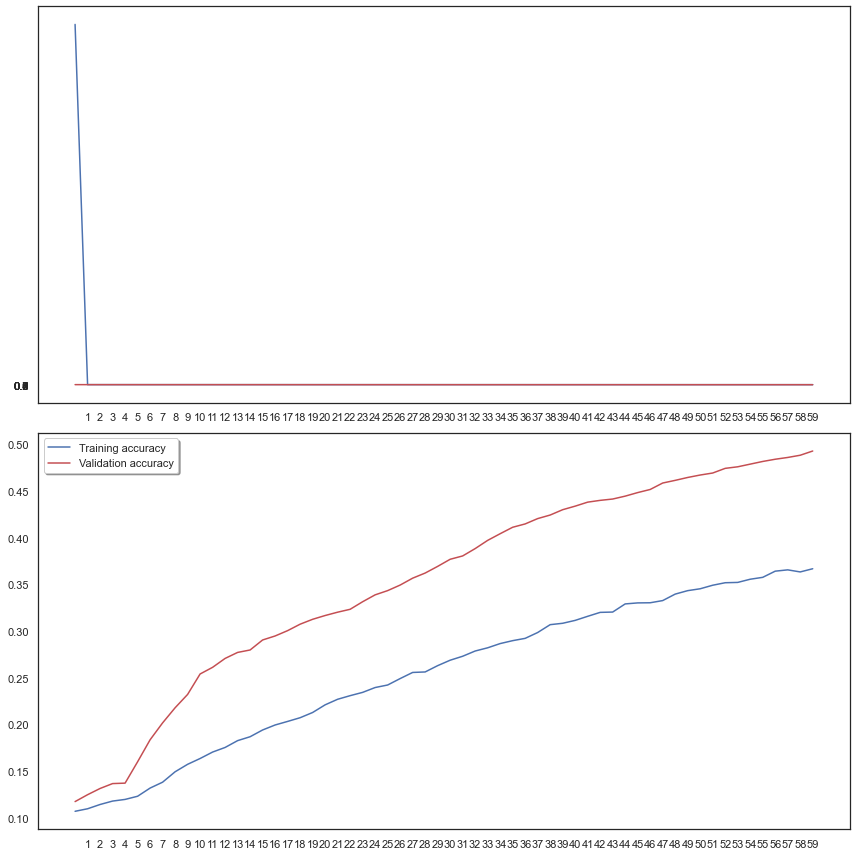

In [167]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [127]:
'Train model using Adagrad'

'Train model using Adagrad'

In [128]:
model.compile(optimizer = Adagrad_opti, loss = loss, metrics = ["accuracy"])


In [168]:
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adagrad.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [169]:
## Training Time!

history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 1.8135 - accuracy: 0.3677 - val_loss: 1.5789 - val_accuracy: 0.4962

Epoch 00001: val_accuracy improved from -inf to 0.49619, saving model to model_CNN_Adagrad.h5
Epoch 2/60
 - 7s - loss: 1.8058 - accuracy: 0.3742 - val_loss: 1.5727 - val_accuracy: 0.4993

Epoch 00002: val_accuracy improved from 0.49619 to 0.49929, saving model to model_CNN_Adagrad.h5
Epoch 3/60
 - 7s - loss: 1.8010 - accuracy: 0.3758 - val_loss: 1.5654 - val_accuracy: 0.4990

Epoch 00003: val_accuracy did not improve from 0.49929
Epoch 4/60
 - 8s - loss: 1.7967 - accuracy: 0.3750 - val_loss: 1.5597 - val_accuracy: 0.5026

Epoch 00004: val_accuracy improved from 0.49929 to 0.50262, saving model to model_CNN_Adagrad.h5
Epoch 5/60
 - 7s - loss: 1.7884 - accuracy: 0.3810 - val_loss: 1.5540 - val_accuracy: 0.5057

Epoch 00005: val_accuracy improved from 0.50262 to 0.50571, saving model to model_CNN_Adagrad.h5
Epoch 6/60
 - 7s - loss: 1.7896 - accuracy: 0.3794 - val_loss: 1.5483 - val_accuracy: 0.50

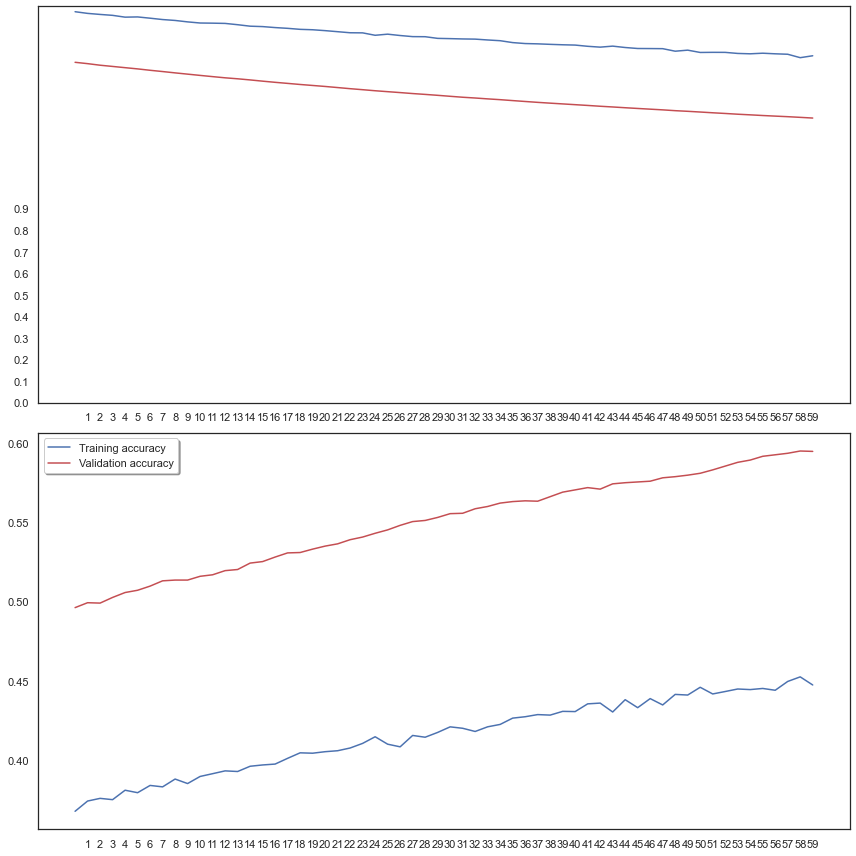

In [170]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [46]:
'Train model using Adadelta'

'Train model using Adadelta'

In [51]:
model.compile(optimizer = Adadelta_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adadelta.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [52]:
## Training Time!

history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 9s - loss: 1.6341 - accuracy: 0.5769 - val_loss: 0.1559 - val_accuracy: 0.9524

Epoch 00001: val_accuracy improved from -inf to 0.95238, saving model to model_CNN_Adadelta.h5
Epoch 2/60
 - 7s - loss: 0.3784 - accuracy: 0.8825 - val_loss: 0.0977 - val_accuracy: 0.9698

Epoch 00002: val_accuracy improved from 0.95238 to 0.96976, saving model to model_CNN_Adadelta.h5
Epoch 3/60
 - 7s - loss: 0.2471 - accuracy: 0.9240 - val_loss: 0.0795 - val_accuracy: 0.9767

Epoch 00003: val_accuracy improved from 0.96976 to 0.97667, saving model to model_CNN_Adadelta.h5
Epoch 4/60
 - 7s - loss: 0.1983 - accuracy: 0.9410 - val_loss: 0.0598 - val_accuracy: 0.9800

Epoch 00004: val_accuracy improved from 0.97667 to 0.98000, saving model to model_CNN_Adadelta.h5
Epoch 5/60
 - 7s - loss: 0.1624 - accuracy: 0.9513 - val_loss: 0.0620 - val_accuracy: 0.9824

Epoch 00005: val_accuracy improved from 0.98000 to 0.98238, saving model to model_CNN_Adadelta.h5
Epoch 6/60
 - 7s - loss: 0.1474 - accuracy:

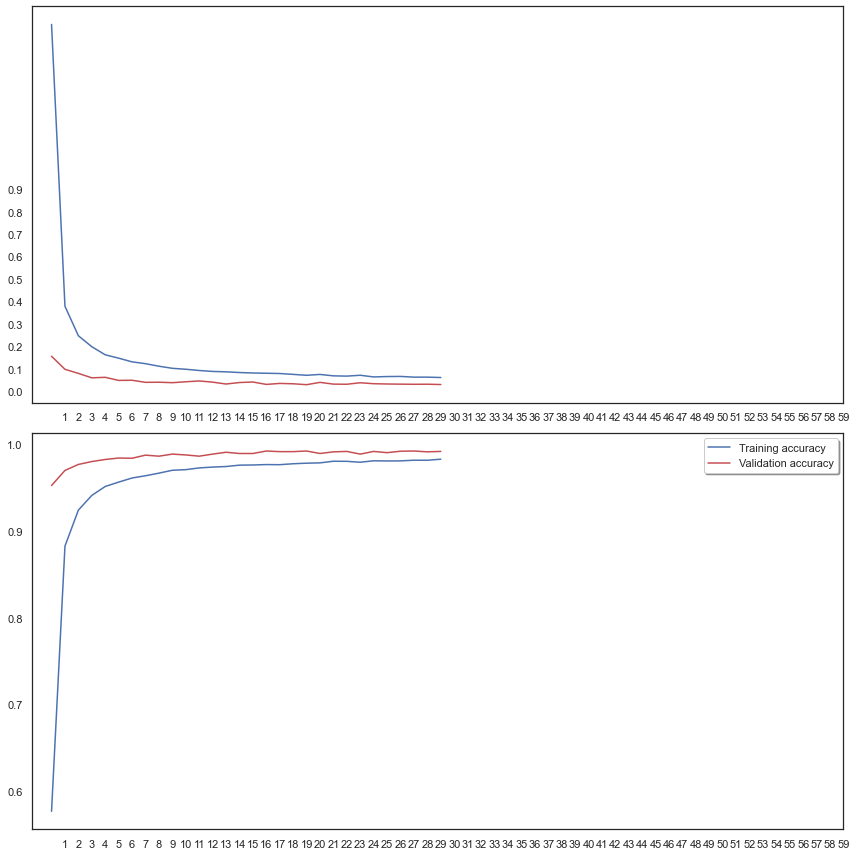

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [54]:
'Train model using RMSProp'

'Train model using RMSProp'

In [55]:
model.compile(optimizer = RMSProp_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_RMSProp.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [56]:
## Training Time!

history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 291625130.8735 - accuracy: 0.1490 - val_loss: 41.3825 - val_accuracy: 0.1986

Epoch 00001: val_accuracy improved from -inf to 0.19857, saving model to model_CNN_RMSProp.h5
Epoch 2/60
 - 7s - loss: 71.7990 - accuracy: 0.1322 - val_loss: 2.3454 - val_accuracy: 0.0974

Epoch 00002: val_accuracy did not improve from 0.19857
Epoch 3/60
 - 7s - loss: 10.3105 - accuracy: 0.1091 - val_loss: 2.3404 - val_accuracy: 0.0974

Epoch 00003: val_accuracy did not improve from 0.19857
Epoch 4/60
 - 7s - loss: 6.4849 - accuracy: 0.1054 - val_loss: 2.3371 - val_accuracy: 0.0974

Epoch 00004: val_accuracy did not improve from 0.19857
Epoch 5/60
 - 7s - loss: 5.4022 - accuracy: 0.1029 - val_loss: 2.3346 - val_accuracy: 0.0974

Epoch 00005: val_accuracy did not improve from 0.19857
Epoch 6/60
 - 7s - loss: 5.4143 - accuracy: 0.1029 - val_loss: 2.3327 - val_accuracy: 0.0974

Epoch 00006: val_accuracy did not improve from 0.19857
Epoch 7/60
 - 7s - loss: 4.4650 - accuracy: 0.1031 - val

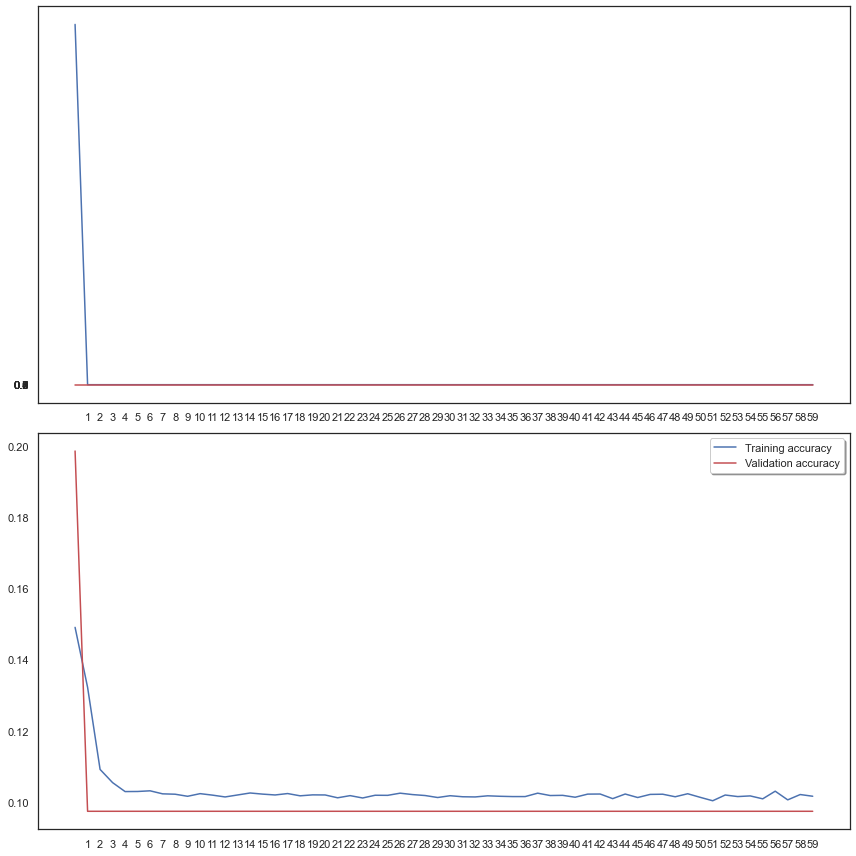

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [58]:
model.compile(optimizer = RMSProp_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_RMSProp.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [59]:
'Train model using Adam'

'Train model using Adam'

In [67]:
model.compile(optimizer = Adam_opti, loss = loss, metrics = ["accuracy"])
mcp = keras.callbacks.ModelCheckpoint("model_CNN_Adam.h5", monitor="val_accuracy", verbose=2,
                      save_best_only=True, save_weights_only=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [68]:

history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch, callbacks=[es, mcp])

Epoch 1/60
 - 7s - loss: 161.2011 - accuracy: 0.1044 - val_loss: 2.3067 - val_accuracy: 0.0995

Epoch 00001: val_accuracy improved from -inf to 0.09952, saving model to model_CNN_Adam.h5
Epoch 2/60
 - 7s - loss: 9.0924 - accuracy: 0.1041 - val_loss: 2.3054 - val_accuracy: 0.0995

Epoch 00002: val_accuracy did not improve from 0.09952
Epoch 3/60
 - 7s - loss: 4.2125 - accuracy: 0.1041 - val_loss: 2.3048 - val_accuracy: 0.0995

Epoch 00003: val_accuracy did not improve from 0.09952
Epoch 4/60
 - 7s - loss: 5.9897 - accuracy: 0.1046 - val_loss: 2.3044 - val_accuracy: 0.0995

Epoch 00004: val_accuracy did not improve from 0.09952
Epoch 5/60
 - 7s - loss: 4.5849 - accuracy: 0.1043 - val_loss: 2.3041 - val_accuracy: 0.0995

Epoch 00005: val_accuracy did not improve from 0.09952
Epoch 6/60
 - 7s - loss: 5.3131 - accuracy: 0.1043 - val_loss: 2.3039 - val_accuracy: 0.0995

Epoch 00006: val_accuracy did not improve from 0.09952
Epoch 7/60
 - 7s - loss: 5.2867 - accuracy: 0.1041 - val_loss: 2.303

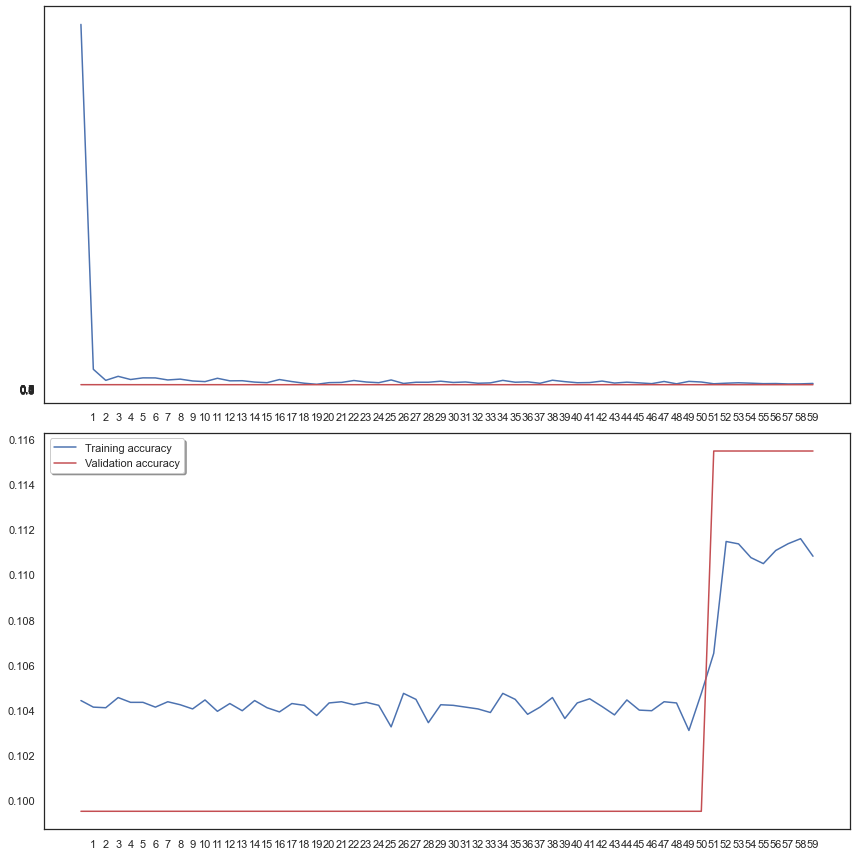

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [70]:
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)


In [71]:
_, test_acc = model.evaluate(testX, testY, verbose = 0)


In [72]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.111, Test: 0.115


In [73]:
predictions = model.predict_classes(testX, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

submissions.to_csv("DR.csv", index=False, header=True)